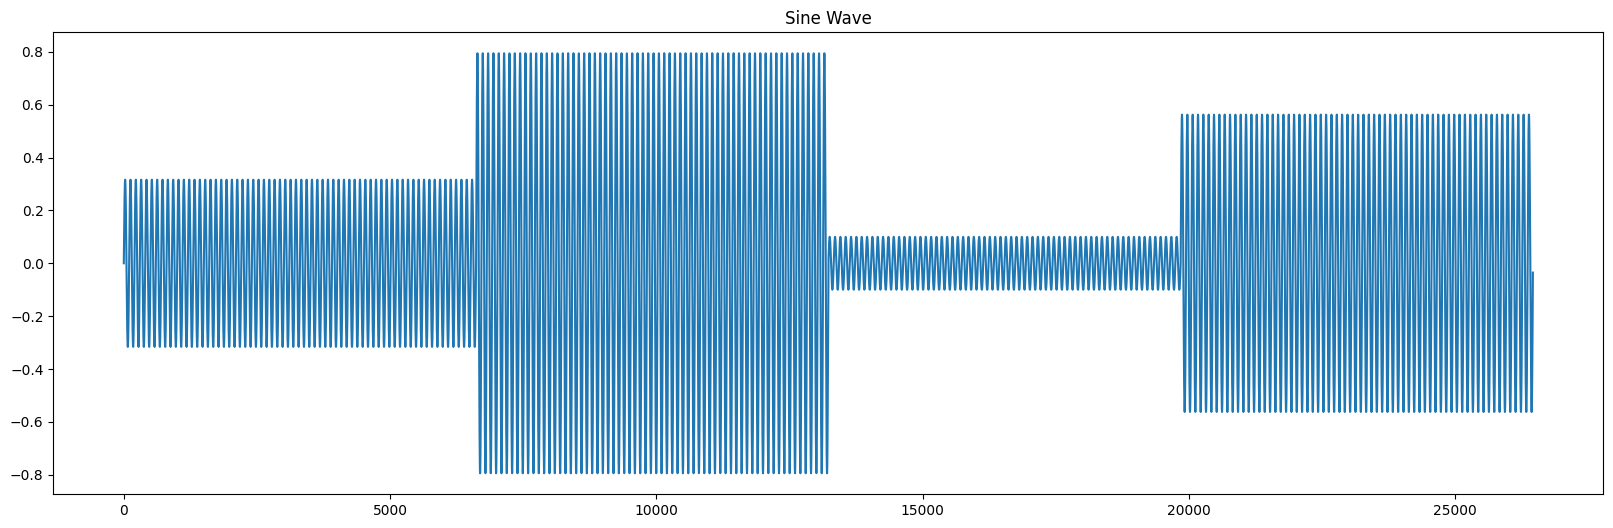

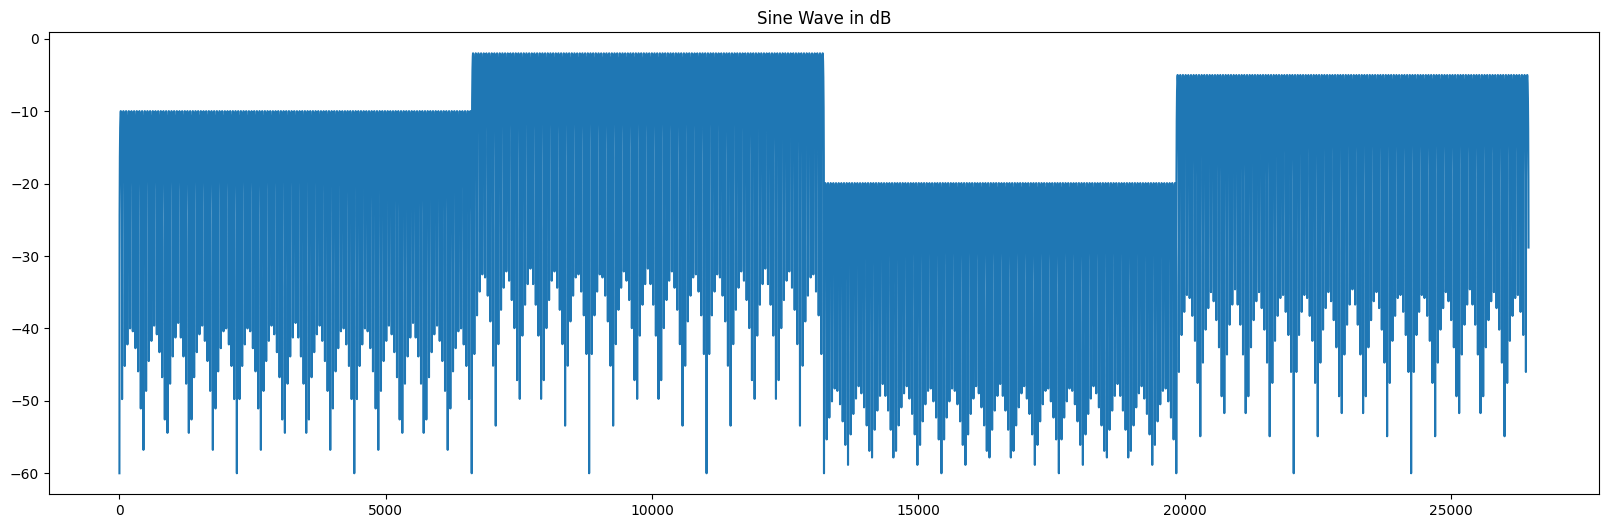

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from compressor_class import Compressor
from env_follower_class import EnvelopeFollower

SAMPLE_RATE = 44100

def db_to_amplitude(db):
    return 10 ** (db / 20.0)

def amp_to_db(amplitude):
    return 20 * np.log10(abs(amplitude) + 0.001)

def generate_sine_wave(frequency, sample_rate, duration, amplitude):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return amplitude * np.sin(2 * np.pi * frequency * t)

block_duration = 0.15 # s
db_levels = [-10, -2, -20, -5]
duration = len(db_levels) * block_duration

buffer = np.array([])

for db in db_levels:
    amplitude = db_to_amplitude(db)
    block = generate_sine_wave(440.0, SAMPLE_RATE, block_duration, amplitude)
    buffer = np.concatenate((buffer, block))

buffer = np.clip(buffer, -1.0, 1.0)

plt.figure(figsize=(20,6))
plt.title('Sine Wave')
plt.plot(buffer)

buffer_db = amp_to_db(buffer)

plt.figure(figsize=(20,6))
plt.title('Sine Wave in dB')
plt.plot(buffer_db)

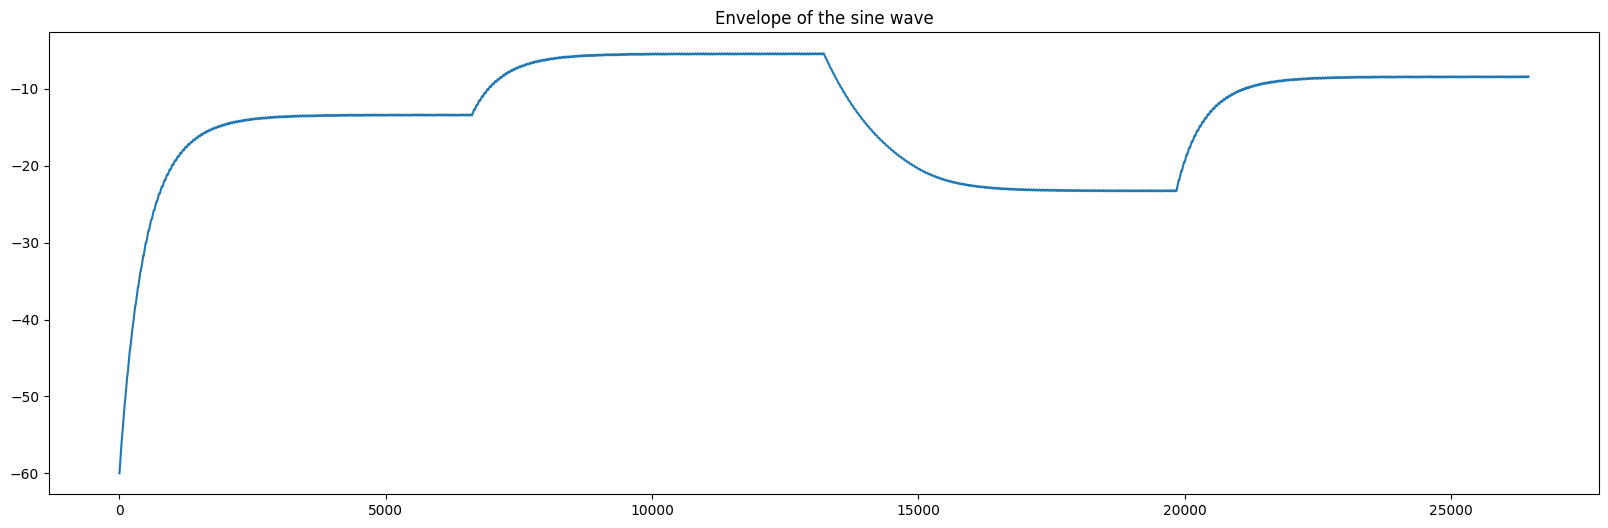

In [7]:
# fun fact: 
# Attack of the envelope is the time it takes for the envelope to reach 63.2% of the target value
# Release of the envelope is the time it takes for the envelope to reach 36.8% of the target value
ATTACK_MS = 10
RELEASE_MS = 30 

env_flw = EnvelopeFollower(ATTACK_MS, RELEASE_MS, SAMPLE_RATE)

env_flw.process(buffer_db)
env = env_flw.get_envelope()

plt.figure(figsize=(20,6))
plt.title('Envelope of the sine wave')
plt.plot(env)

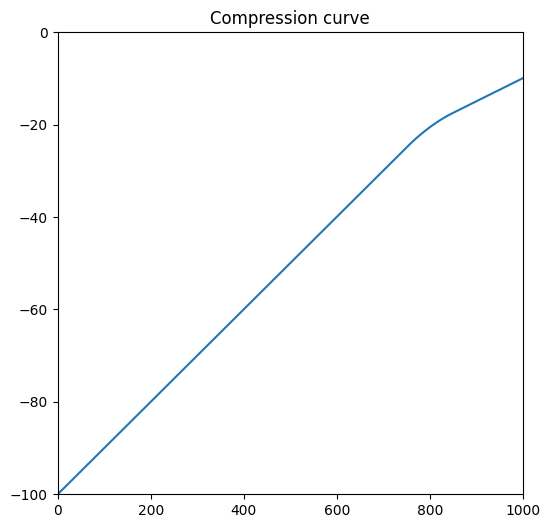

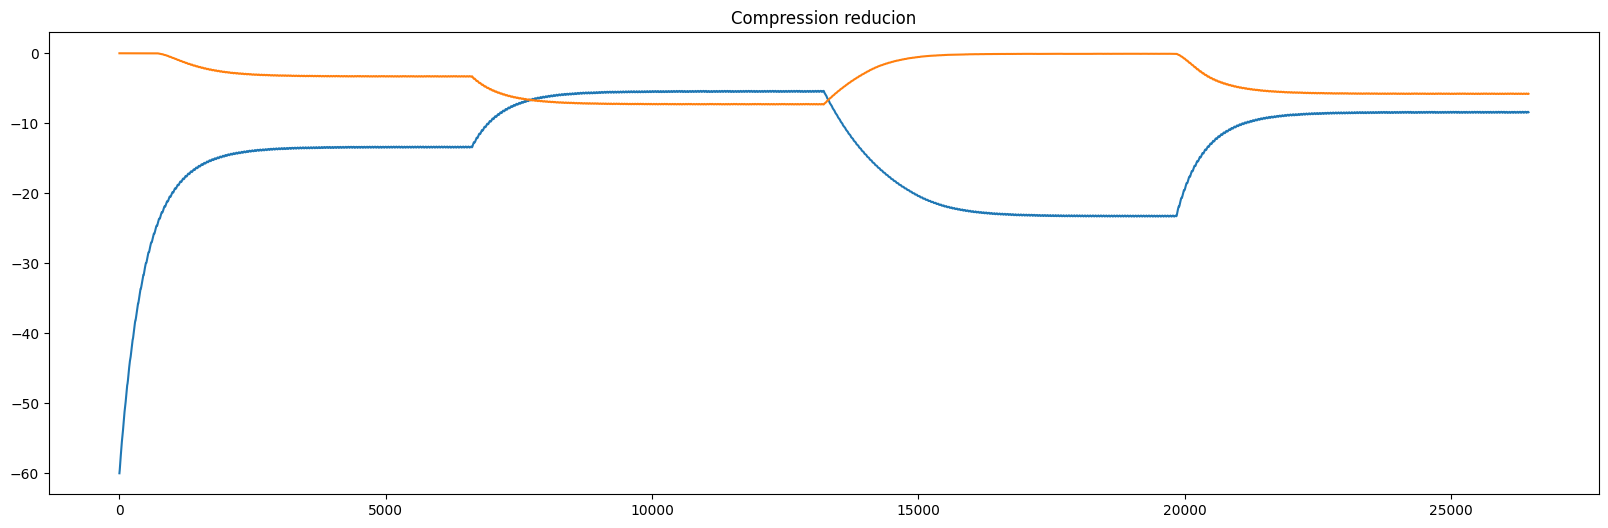

In [10]:
THRESHOLD = -20.0
RATIO = 2.0
KNEE = 10.0

comp = Compressor(Th=THRESHOLD, R=RATIO, W=KNEE, ATT=ATTACK_MS, REL=RELEASE_MS, fs=SAMPLE_RATE)

curve = comp.get_compressor_curve()

plt.figure(figsize=(6,6))
plt.title('Compression curve')
plt.plot(curve)
plt.xlim(0, 1000)
plt.ylim(-100, 0)
plt.show()

output = comp.apply_compression(buffer_db)

# plot output agains input
plt.figure(figsize=(20,6))
plt.title('Compression reducion')
plt.plot(env)
plt.plot(output)
plt.show()

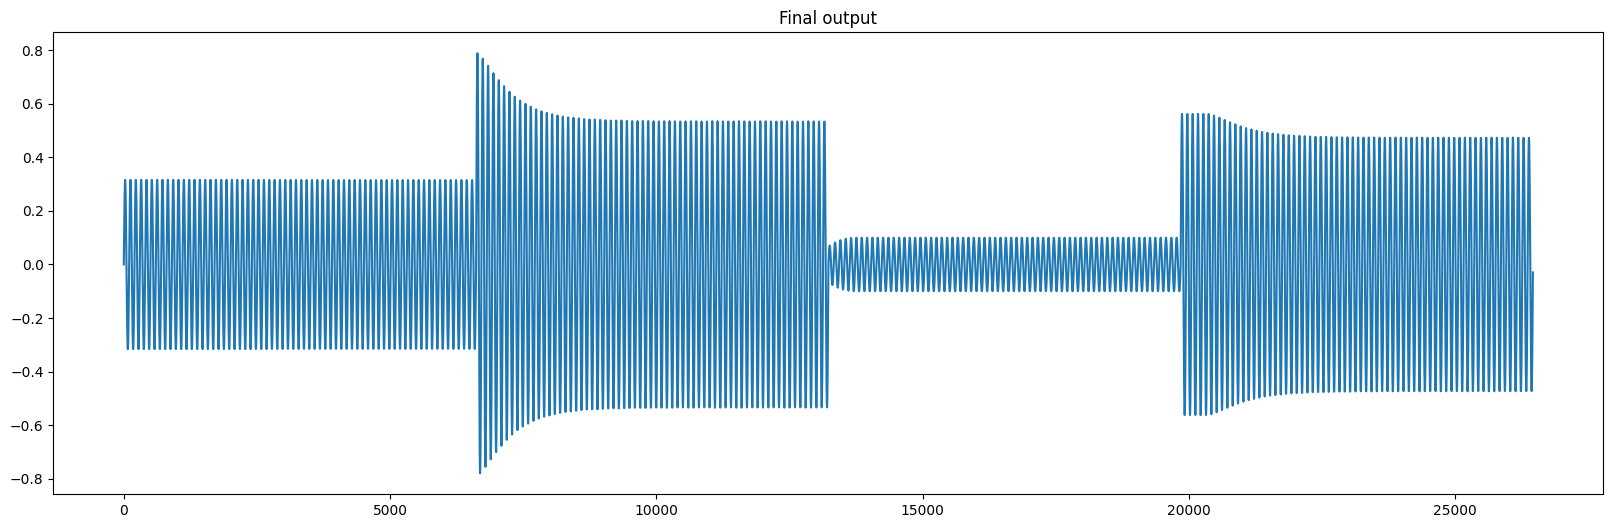

In [4]:
final_output = buffer * db_to_amplitude(output)

plt.figure(figsize=(20,6))
plt.title('Final output')
plt.plot(final_output)
plt.show()